In [1]:
import numpy as np
from sklearn.preprocessing import scale

In [2]:
dataset=np.loadtxt("Audiobooks-data.csv",delimiter=',')

In [3]:
input_dataset=dataset[:,1:-1]
target_dataset=dataset[:,-1]

In [4]:
target_dataset

array([1., 1., 1., ..., 0., 0., 0.])

In [5]:
num_one_targets=int(np.sum(target_dataset))
num_one_targets

2237

In [6]:
target_dataset.shape[0]

14084

In [7]:
zero_targets_counter=0
indices_to_remove=[]

In [8]:
for i in range(target_dataset.shape[0]):
    if target_dataset[i]==0:
        zero_targets_counter+=1
        if zero_targets_counter>num_one_targets:
            indices_to_remove.append(i)

In [9]:
balanced_input_data=np.delete(input_dataset,indices_to_remove,axis=0)
balanced_target_data=np.delete(target_dataset,indices_to_remove,axis=0)

In [10]:
balanced_target_data

array([1., 1., 1., ..., 0., 0., 0.])

In [11]:
balanced_input_data.shape[0]

4474

In [12]:
scaled_input_data=scale(balanced_input_data)

In [13]:
shufled_indices=np.arange(scaled_input_data.shape[0])
shufled_indices

array([   0,    1,    2, ..., 4471, 4472, 4473])

In [14]:
np.random.shuffle(shufled_indices)
shufled_indices

array([3384, 1766, 2971, ...,  279,   36,  418])

In [15]:
shuffled_input_dataset=scaled_input_data[shufled_indices]
shuffled_target_dataset=balanced_target_data[shufled_indices]
shuffled_input_dataset

array([[ 1.18956512,  0.36398846, -0.32011072, ...,  0.87479777,
        -0.20536617,  1.54822135],
       [ 1.18956512,  0.36398846, -0.38189654, ..., -0.8635056 ,
        -0.20536617,  0.37726085],
       [-1.8500202 , -1.37306153,  0.20727535, ...,  1.01827678,
        -0.20536617, -0.77240946],
       ...,
       [ 0.64678203,  2.22511345, -0.38189654, ...,  0.49402656,
        -0.20536617, -0.77240946],
       [ 0.10399894, -0.25638654, -0.38189654, ..., -0.8635056 ,
        -0.20536617, -0.77240946],
       [-0.76445401,  1.97696345,  1.3834125 , ..., -0.42203173,
        -0.20536617,  1.73983307]])

In [16]:
count_samples=int(shuffled_input_dataset.shape[0])
num_train_samples=int(0.8*count_samples)
num_validation_samples=int(0.1*count_samples)
num_test_samples=int(0.1*count_samples)

train_inputs=shuffled_input_dataset[:num_train_samples]
train_targets=shuffled_target_dataset[:num_train_samples]

validation_inputs=shuffled_input_dataset[num_train_samples:num_train_samples+num_validation_samples]
validation_targets=shuffled_target_dataset[num_train_samples:num_train_samples+num_validation_samples]

test_inputs=shuffled_input_dataset[num_train_samples+num_validation_samples:]
test_targets=shuffled_target_dataset[num_train_samples+num_validation_samples:]

print(train_inputs.shape[0])
print(validation_inputs.shape[0])
print(test_inputs.shape[0])

3579
447
448


In [17]:
np.savez("Audiobooks_data_train",inputs=train_inputs,targets=train_targets)
np.savez("Audiobooks_data_validation",inputs=validation_inputs,targets=validation_targets)
np.savez("Audiobooks_data_test",inputs=test_inputs,targets=test_targets)

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
input_layer=10
output_layers=2
hidden_layers=50
model=Sequential([
                 Dense(units=hidden_layers,activation="relu"),
                 Dense(units=hidden_layers,activation="relu"),
                 Dense(units=output_layers,activation="softmax")
                 ])
batch_size=100
max_epochs=50
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(train_inputs,train_targets,batch_size=batch_size,epochs=max_epochs,
                  callbacks=EarlyStopping(monitor="val_accuracy",patience=3),
          validation_data=(validation_inputs,validation_targets),verbose=2)

Epoch 1/50
36/36 - 2s - loss: 0.5521 - accuracy: 0.7508 - val_loss: 0.4242 - val_accuracy: 0.8658 - 2s/epoch - 49ms/step
Epoch 2/50
36/36 - 0s - loss: 0.3777 - accuracy: 0.8695 - val_loss: 0.3385 - val_accuracy: 0.8725 - 285ms/epoch - 8ms/step
Epoch 3/50
36/36 - 0s - loss: 0.3248 - accuracy: 0.8782 - val_loss: 0.3146 - val_accuracy: 0.8792 - 248ms/epoch - 7ms/step
Epoch 4/50
36/36 - 0s - loss: 0.3032 - accuracy: 0.8835 - val_loss: 0.3037 - val_accuracy: 0.8814 - 265ms/epoch - 7ms/step
Epoch 5/50
36/36 - 0s - loss: 0.2891 - accuracy: 0.8877 - val_loss: 0.2910 - val_accuracy: 0.8904 - 273ms/epoch - 8ms/step
Epoch 6/50
36/36 - 0s - loss: 0.2788 - accuracy: 0.8921 - val_loss: 0.2848 - val_accuracy: 0.8926 - 278ms/epoch - 8ms/step
Epoch 7/50
36/36 - 0s - loss: 0.2743 - accuracy: 0.8938 - val_loss: 0.2832 - val_accuracy: 0.8926 - 270ms/epoch - 8ms/step
Epoch 8/50
36/36 - 0s - loss: 0.2665 - accuracy: 0.8975 - val_loss: 0.2779 - val_accuracy: 0.8949 - 261ms/epoch - 7ms/step
Epoch 9/50
36/36 -

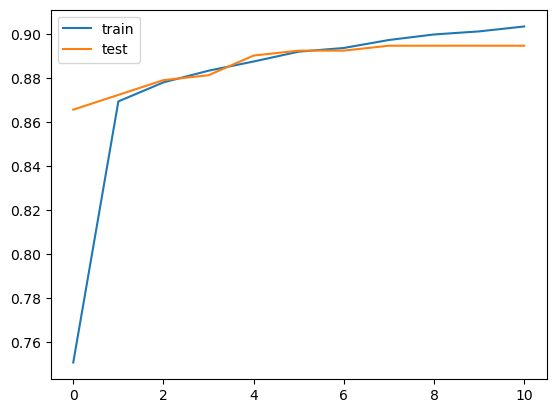

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history['val_accuracy'],label="test")
plt.legend()
plt.show()

In [21]:
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(test_inputs,test_targets.ravel(),clf=model,legend=2)
# plt.show()

In [22]:
test_loss,test_accuracy=model.evaluate(test_inputs,test_targets)
print("test_accuracy",test_accuracy)
print("test_loss",test_loss)

14/14 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9308
test_accuracy 0.9308035969734192
test_loss 0.2112375646829605
